Прежде чем сдать это задание, убедитесь, что все работает должным образом. 
Для этого следует "выполнить всё" в документе.

Убедитесь, что вы заполнили все места, где написано «ВАШ КОД ЗДЕСЬ» или «ВАШ ОТВЕТ ЗДЕСЬ».

In [195]:
NAME = "Evgeniy Dedkov"
COLLABORATORS = ""

import numpy as np
import matplotlib.pyplot as plt

#  Вводное задание. 

Вектора х1 и у1 из архива дают значения некоторой функции $f(x) .$ Постройте на графике, используя библиотечные функции:

(a) Интерполяционный Лагранжев многочлен.

(b) Интерполяционный кубический сплайн (CubicSpline).

(c) Монотонный кубический интерполянт (PchipInterpolator).

(d)  Аппроксимацию полиномами, используя функции np. polyfit и np.polyval. 

---

In [196]:
data = np.load("data_7_1.npz")
x1 = data['x1']
y1 = data['y1']

In [197]:
from scipy import interpolate

lagrange = interpolate.lagrange(x1, y1)
cubic = interpolate.CubicSpline(x1, y1)
cubic2 = interpolate.interp1d(x1, y1, "cubic")
pchip = interpolate.PchipInterpolator(x1, y1)
nppoly = np.polyfit(x1, y1, x1.size)

newx = np.linspace(x1.min(), x1.max(), 100)
ylag = lagrange(newx)
ycub = cubic(newx)
ycub2 = cubic2(newx)
ypchip = pchip(newx)
ynppoly = np.polyval(nppoly, newx)

C:\Users\dedko\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


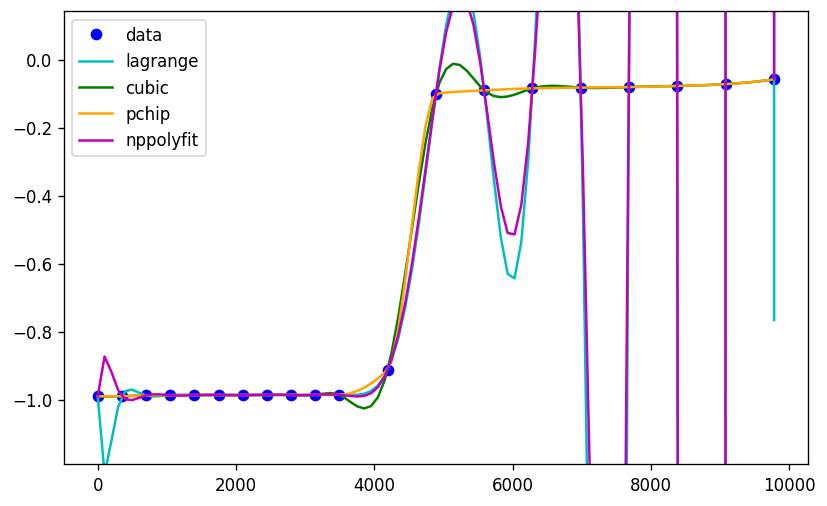

In [198]:
plt.figure(figsize = (8, 5), dpi = 120)
plt.plot(x1, y1, 'bo', newx, ylag, 'c-', newx, ycub, 'g-', newx, ypchip, 'orange', newx, ynppoly, 'm')
plt.legend(("data", "lagrange", "cubic", "pchip", "nppolyfit"), loc='best')
ax = plt.gca()
ax.set_ylim([y1.min()-0.2, y1.max()+0.2])
plt.show()

# Интерполяция полиномом Лагранжа.

Напишите класс, который конструирует интерполяционный полином Лагранжа, проходящий через точки, заданные как `xk` и `yk`.

In [199]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        ans = 0
        for k in range(self.xk.size):
            tmp = self.xk[np.arange(self.xk.size) != k]
            ans += np.prod(x - tmp) / np.prod(self.xk[k] - tmp) * self.yk[k]
 
        return ans

In [200]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

## Феномер Рунге

Рассмотрим функцию Рунге, $y = 1/(1 + 25x^2)$. Интерполируйте эту функцию на интервале $x\in [-2, 2]$, используя полином Лагранжа с $m=3, 5, 7, 11$. Используйте равномерную сетку. Нарисуйте результат интерполяции вместе с исходной функцией на одном графике. 

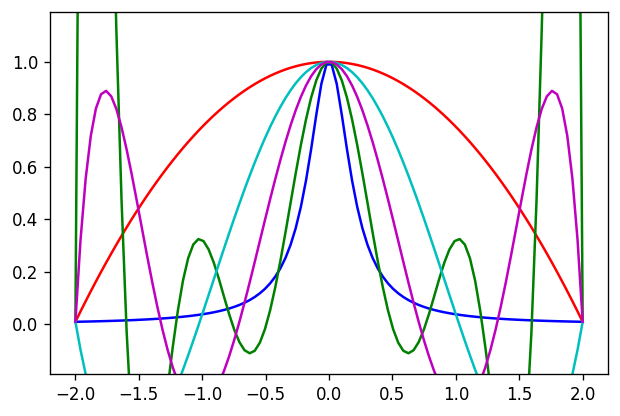

In [201]:
x = np.linspace(-2, 2, 100)
y = runge_func(x, a = 25)

ms = {3, 5, 7, 11}
yl = [interpolate.lagrange(np.linspace(-2, 2, m), runge_func(np.linspace(-2, 2, m)))(x) for m in ms]
clrs = ['r', 'g', 'c', 'm']

plt.figure(figsize=(6,4), dpi=120)
plt.plot(x, y, 'b-')
for yn, clr in zip(yl, clrs):
    plt.plot(x, yn, clr)
    
ax = plt.gca()
ax.set_ylim([y.min()-0.2, y.max()+0.2])

#plt.legend(("init", "m=3", "m=5", "m=7", "m=11"), loc='best')
plt.show()

Допишите функцию, которая возвращает узлы Чебышева. 

In [202]:
def cheb_nodes(n, a=-1, b=1):
    r"""Chebyshev nodes of degree $n$ on $[a, b]$
    """
    return np.flip((a + b) / 2 + (b - a) / 2 * np.cos((2*np.arange(n) + 1) / 2 / n * np.pi))


In [203]:
nodes_11 = cheb_nodes(11)
nodes_11 = np.asarray(nodes_11)
assert (nodes_11[1:] > nodes_11[:-1]).all()

from scipy.special import roots_chebyt
nodes, weights = roots_chebyt(5) 

assert_allclose(cheb_nodes(5),
                nodes, atol=1e-14)

assert_allclose(cheb_nodes(5, a=-1, b=3),
                nodes*2 + 1, atol=1e-14)

Повторите интерполяцию Лагранжа функции Рунге с помощью узлов Чебышева. Постройте интерполянты.
Также постройте интерполяцию кубическим сплайном тех же данных (`scipy.interpolate.CubicSpline`).
Сравните величину явления Рунге для равномерной сетки и сетки Чебышева. Демонстрирует ли интерполяция сплайнами феномен Рунге?


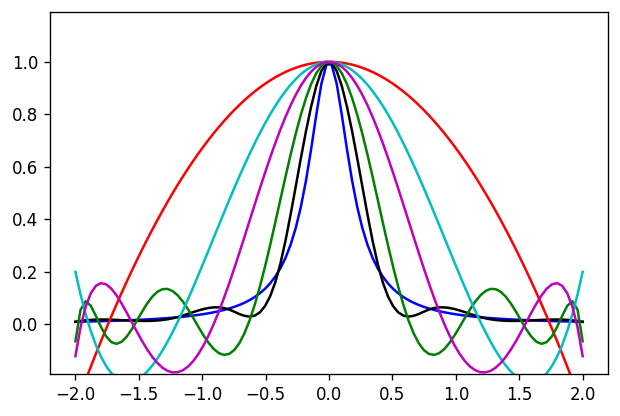

In [204]:
ylc = [interpolate.lagrange(cheb_nodes(m, -2, 2), runge_func(cheb_nodes(m, -2, 2)))(x) for m in ms]

plt.figure(figsize=(6,4), dpi=120)
plt.plot(x, y, 'b-')
plt.plot(x, interpolate.CubicSpline(np.linspace(-2, 2, 11), runge_func(np.linspace(-2, 2, 11)))(x), 'k') 
for yn, clr in zip(ylc, clrs):
    plt.plot(x, yn, clr)   
    
ax = plt.gca()
ax.set_ylim([y.min()-0.2, y.max()+0.2])

#plt.legend(("init", "m=3", "m=5", "m=7", "m=11"), loc='best')
plt.show()

Узлы чебышева позволяют существенно ументшить феномен Рунге.

Кубический сплайн гораздо более устойчив к осцилляциям.

------------------------------------------------------------

Другим известным трудным тестом для интерполяции является следующая периодическая функция:

$u(x)=\frac{\sqrt{\varepsilon(2+\varepsilon)}}{2 \pi(1+\varepsilon-\cos x)}, \quad-\pi \leq x \leq \pi, \quad \varepsilon=0.21  $

Проведите аналогичные вычисления и постройте графики для неё.

In [205]:
def u_func(x, e=0.21):
    return np.sqrt(e*(2+e)) / (2*np.pi*(1 + e - np.cos(x)))

In [206]:
x2 = np.linspace(-np.pi, np.pi, 100)
y2 = u_func(x2)

ylc2 = [interpolate.lagrange(cheb_nodes(m, -np.pi, np.pi), u_func(cheb_nodes(m, -np.pi, np.pi)))(x2) for m in ms]
yl11 = interpolate.lagrange(np.linspace(-np.pi, np.pi, 11), u_func(np.linspace(-np.pi, np.pi, 11)))(x2)

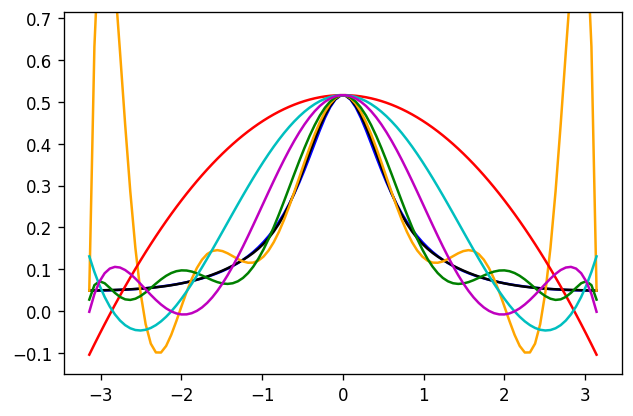

In [207]:
plt.figure(figsize=(6,4), dpi=120)
plt.plot(x2, y2, 'b-')
plt.plot(x2, interpolate.CubicSpline(np.linspace(-np.pi, np.pi, 11), u_func(np.linspace(-np.pi, np.pi, 11)))(x2), 'k')
plt.plot(x2, yl11, 'orange')
for yn, clr in zip(ylc2, clrs):
    plt.plot(x2, yn, clr)   
    
ax = plt.gca()
ax.set_ylim([y2.min()-0.2, y2.max()+0.2])
plt.show()

Здесь сплайн уже весьма точно приближает исходную функцию. Оранжевая кривая, показывает, что эффект Рунге остается для линейной сетки, для сетки из корней полиномов чебышева он меньше.
_________________________________________________________

Постройте интерполяцию функций

$$
y_{1}(x)=\sin (6 x)+\sin \left(60 e^{x}\right), y_{2}(x)=\frac{1}{1+1000(x+0.5)^{2}}+\frac{1}{\sqrt{1+1000(x-0.5)^{2}}}
$$

на отрезке $[-1,1]$ полиномами Чебышева. Постройте зависимость ошибки приближения от количества узлов. Сколько узлов нужно удержать в каждом из этих случаев для получения достаточно точного приближения?

In [208]:
def f1_func(x):
    return np.sin(6*x) + np.sin(60*np.exp(x))

def f2_func(x):
    return 1 / (1 + 1000*(x + 0.5)**2) + 1 / np.sqrt(1 + 1000 * (x - 0.5)**2)

In [209]:
x3 = np.linspace(-1, 1, 200)
y1 = f1_func(x3)
y2 = f2_func(x3)

chf1 = np.polynomial.chebyshev.Chebyshev.interpolate(f1_func, 100)
chf2 = np.polynomial.chebyshev.Chebyshev.interpolate(f2_func, 120)

y1ch = chf1(x3)
y2ch = chf2(x3)

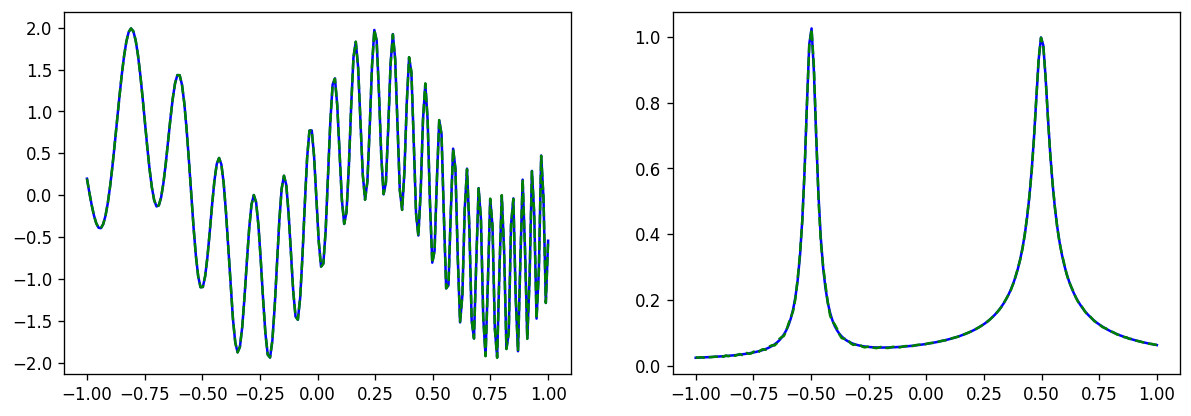

In [210]:
plt.figure(figsize=(12,4), dpi=120)
plt.subplot(1, 2, 1)
plt.plot(x3, y1, 'b-')
plt.plot(x3, y1ch, 'g--')
plt.subplot(1, 2, 2)
plt.plot(x3, y2, 'b-')
plt.plot(x3, y2ch, 'g--')
plt.show()

In [211]:
# lets find optimal node count
ks = np.arange(1, 200)
err1 = np.asarray([np.abs(np.polynomial.chebyshev.Chebyshev.interpolate(f1_func, k)(x3) - f1_func(x3)).max() 
                   for k in ks], dtype = float)
err2 = np.asarray([np.abs(np.polynomial.chebyshev.Chebyshev.interpolate(f2_func, k)(x3) - f2_func(x3)).max() 
                   for k in ks], dtype = float)

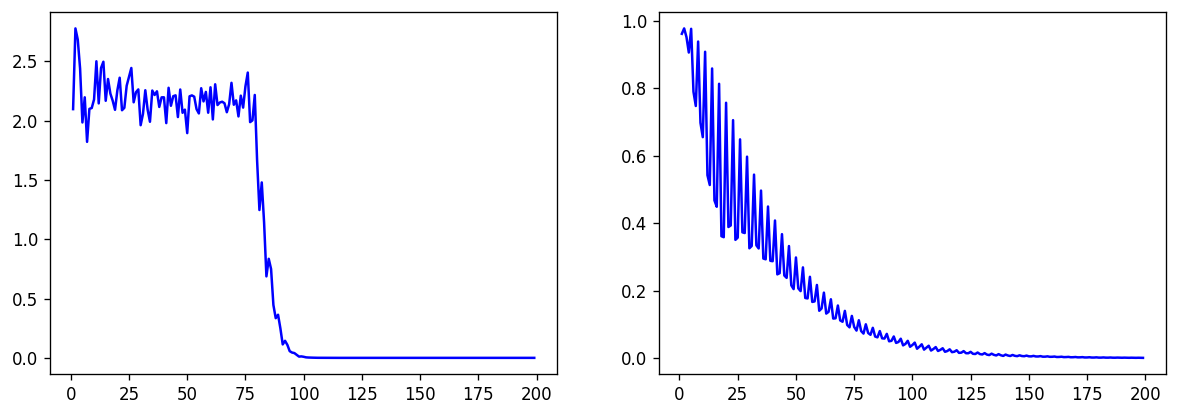

In [212]:
plt.figure(figsize=(12,4), dpi=120)
plt.subplot(1, 2, 1)
plt.plot(ks, err1, 'b-')
plt.subplot(1, 2, 2)
plt.plot(ks, err2, 'b-')
plt.show()

Видно, что довольно точное приближение в перво случае получается при 100 узлах. Во втором ошибка в 0.02 единицы дорстинается при 120 узлах и в целом падает при росте их числа.

Построим графики для этих чисел в примерах выше (раньше там было 60 и 40, я просто поменял)

--------------------------------------------------

Вектора х4 и у4 из архива дают значения некоторой функции на равномерной сетке на отрезке [-0.75, 0.75]. Используя scipy . optimize.curve_fit, постройте интерполяцию функции $y(x)$ функциями вида

$$
y_{1}(x)=p_{0}+p_{1} x+p_{2} x^{2}+p_{3} x^{3}+p_{4} x^{4}+p_{5} x^{5}, y_{2}(x)=\frac{p_{0}+p_{1} x+p_{2} x^{2}+p_{3} x^{3}}{1+q_{1} x+q_{2} x^{2}}
$$


Какая из этих формул лучше описывает $y(x)$ на заданном интервале? Постройте график экстраполяции $y(x)$ за пределы исходных данных. Можете ли вы угадать аналитическое выражение для $y(x) ?$

In [213]:
x4 = data['x4']
y4 = data['y4']

In [214]:
def f1(x, p0, p1, p2, p3, p4, p5):
    return p0 + p1*x + p2*x**2 + p3*x**3 + p4*x**4 + p5*x**5

def f2(x, p0, p1, p2, p3, q1, q2):
    return (p0 + p1*x + p2*x**2 + p3*x**3) / (1 + q1*x + q2*x**2)

In [215]:
from scipy import optimize

p1, *_ = optimize.curve_fit(f1, x4, y4)
p2, *_ = optimize.curve_fit(f2, x4, y4)

xnew = np.linspace(-1, 1, 500)
y41 = f1(xnew, *p1) 
y42 = f2(xnew, *p2) 

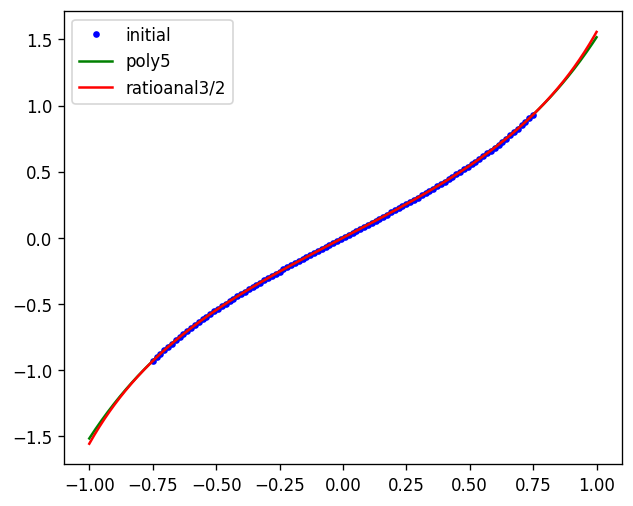

In [216]:
plt.figure(figsize=(6,5), dpi=120)
plt.plot(x4, y4, 'b.')
plt.plot(xnew, y41, 'g-')
plt.plot(xnew, y42, 'r-')
plt.legend(("initial", "poly5", "ratioanal3/2"), loc='best')
plt.show()

Аналитическое выражение не угадывается... Это может быть в принципе как кубическая парабола, так и тангенс... Или какая-то комбинация экспонент...

-----------------------------------------------------------------------------------

Вектора х5 и у5 из архива задают некоторую функцию на равномерной сетке на отрезке $[-1,1] .$ 

Составьте соответствующий интерполяционный многочлен и постройте его график. Ожидаемо, получившийся интерполянт демонстрирует явление Рунге. Теперь проделайте замену переменной $x \rightarrow s$ по формуле $x=g(s)$, где
$$
g(s)=\frac{1}{53089}\left(40320 s+6720 s^{3}+3024 s^{5}+1800 s^{7}+1225 s^{9}\right)
$$

 функция, приближённо отображающая равномерную сетку в сетку узлов Чебышева. В новой переменной $s$, составьте интерполяционный многочлен $P(s) .$ Постройте график получившейся интерполяции исходной функции $P(s(x))$. Делает ли такая процедура явление Рунге менее выраженным? 

In [217]:
x5 = data['x5']
y5 = data['y5']

In [218]:
int_pol = interpolate.lagrange(x5, y5)
xnew = np.linspace(-1, 1, 500)
y5lag = int_pol(xnew)

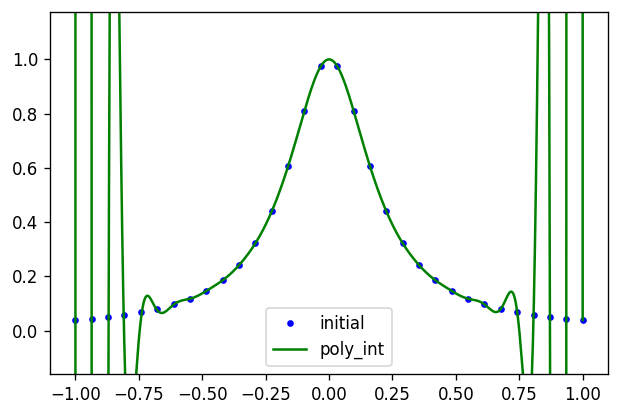

In [219]:
plt.figure(figsize=(6,4), dpi=120)
plt.plot(x5, y5, 'b.')
plt.plot(xnew, y5lag, 'g-')
plt.legend(("initial", "poly_int"), loc='best')
ax = plt.gca()
ax.set_ylim(y5.min()-0.2, y5.max()+0.2)
plt.show()

In [220]:
def g(s):
    return (40320*s + 6720*s**3 + 3024*s**5 + 1800*s**7 + 1225*s**9) / 53089

In [221]:
# lets evaluate g^-1 (x_node)

s_table = np.linspace(-1.001, 1.001, 1000)
x_table = g(s_table)

def g_inv(x):
    i = np.searchsorted(x_table, x)
    return s_table[i-1] + (s_table[i] - s_table[i-1]) / (x_table[i] - x_table[i-1]) * (x - x_table[i-1])

In [222]:
s = g_inv(x5)
P = interpolate.lagrange(s, y5)
snew = np.linspace(-1, 1, 500)
xsnew = g(snew)
y5ls = P(snew)

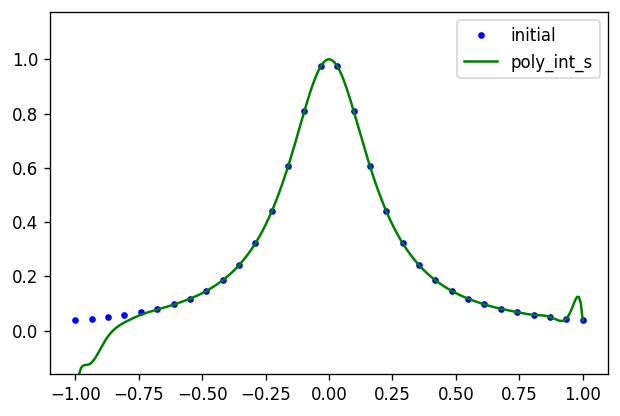

In [223]:
plt.figure(figsize=(6,4), dpi=120)
plt.plot(x5, y5, 'b.')
plt.plot(xsnew, y5ls, 'g-')
plt.legend(("initial", "poly_int_s"), loc='best')
ax = plt.gca()
ax.set_ylim(y5.min()-0.2, y5.max()+0.2)
plt.show()

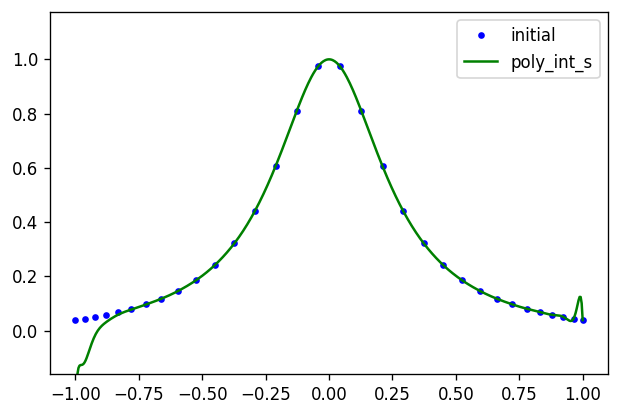

In [224]:
plt.figure(figsize=(6,4), dpi=120)
plt.plot(s, y5, 'b.')
plt.plot(snew, y5ls, 'g-')
plt.legend(("initial", "poly_int_s"), loc='best')
ax = plt.gca()
ax.set_ylim(y5.min()-0.2, y5.max()+0.2)
plt.show()

In [225]:
print(s)

[-0.99999866 -0.96382878 -0.92410238 -0.88044641 -0.83252377 -0.78007539
 -0.72296351 -0.66119963 -0.59495586 -0.52454808 -0.45040328 -0.37302344
 -0.29295628 -0.21077675 -0.1270772  -0.04246113  0.04246113  0.1270772
  0.21077675  0.29295628  0.37302344  0.45040328  0.52454808  0.59495586
  0.66119963  0.72296351  0.78007539  0.83252377  0.88044641  0.92410238
  0.96382878  0.99999866]


Что-то не понял, почему полином уплыл, ну и ладно... Явление Рунге действительно менее выраженно.